In [1]:
import json
import os
import nibabel as nb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.patches as mpatches

In [2]:
cur_dir = os.getcwd()
json_path = os.path.abspath(os.path.join(cur_dir, os.pardir, 'datasets\\Task01_BrainTumour\\dataset.json'))

In [3]:
with open(json_path) as json_file:
    metadata = json.load(json_file)

In [4]:
def data_load(ind):

    print(metadata['training'][ind])

    image_path = os.path.abspath(os.path.join(cur_dir, os.pardir, 'datasets\\Task01_BrainTumour', metadata['training'][ind]['image']))
    img = nb.load(image_path)

    label_path = os.path.abspath(os.path.join(cur_dir, os.pardir, 'datasets\\Task01_BrainTumour', metadata['training'][ind]['label']))
    lab = nb.load(label_path)

    img0 = img.get_fdata()
    lab0 = lab.get_fdata()

    name_img = metadata['training'][ind]['label'].split('/')[-1].split('.')[0]
    
    return img0, lab0, name_img

In [5]:
metadata

{'name': 'BRATS',
 'description': 'Gliomas segmentation tumour and oedema in on brain images',
 'reference': 'https://www.med.upenn.edu/sbia/brats2017.html',
 'licence': 'CC-BY-SA 4.0',
 'release': '2.0 04/05/2018',
 'tensorImageSize': '4D',
 'modality': {'0': 'FLAIR', '1': 'T1w', '2': 't1gd', '3': 'T2w'},
 'labels': {'0': 'background',
  '1': 'edema',
  '2': 'non-enhancing tumor',
  '3': 'enhancing tumour'},
 'numTraining': 484,
 'numTest': 266,
 'training': [{'image': './imagesTr/BRATS_457.nii.gz',
   'label': './labelsTr/BRATS_457.nii.gz'},
  {'image': './imagesTr/BRATS_306.nii.gz',
   'label': './labelsTr/BRATS_306.nii.gz'},
  {'image': './imagesTr/BRATS_206.nii.gz',
   'label': './labelsTr/BRATS_206.nii.gz'},
  {'image': './imagesTr/BRATS_449.nii.gz',
   'label': './labelsTr/BRATS_449.nii.gz'},
  {'image': './imagesTr/BRATS_318.nii.gz',
   'label': './labelsTr/BRATS_318.nii.gz'},
  {'image': './imagesTr/BRATS_218.nii.gz',
   'label': './labelsTr/BRATS_218.nii.gz'},
  {'image': './

In [6]:
def plot_3D_MRI(layer):
    
    plt.figure(figsize=(10,10))
    
#     colors = ['none','magenta', 'green', 'orange']
    colors = ['none', 'gold', 'indigo', 'lightseagreen']
    vmin = 0
    vmax = len(colors)
    cmap = matplotlib.colors.ListedColormap(colors)
    labels = metadata["labels"]
    
    patches = [mpatches.Patch(color=colors[i],label=labels[str(i)]) for i in range(4)]
    
    plt.subplot(2,2,1)
    plt.imshow(img0[:,:,layer,0].T, cmap='gray')
    plt.imshow(lab0[:,:,layer].T, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["0"])
    
    plt.subplot(2,2,2)
    plt.imshow(img0[:,:,layer,1].T, cmap='gray')
    plt.imshow(lab0[:,:,layer].T, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["1"])
    
    plt.subplot(2,2,3)
    plt.imshow(img0[:,:,layer,2].T, cmap='gray')
    plt.imshow(lab0[:,:,layer].T, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["2"])
    
    plt.subplot(2,2,4)
    plt.imshow(img0[:,:,layer,3].T, cmap='gray')
    plt.imshow(lab0[:,:,layer].T, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["3"])
    
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 2.0), loc=2, borderaxespad=0.)
    plt.suptitle(name_img)

In [7]:
img0, lab0, name_img = data_load(57)

interact(plot_3D_MRI, layer = (0, lab0.shape[2]-1))
plt.show()

{'image': './imagesTr/BRATS_005.nii.gz', 'label': './labelsTr/BRATS_005.nii.gz'}


interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [8]:
def plot_3D_MRI_hist(layer):
    
    plt.figure(figsize=(12,10))
    
    plt.subplot(3,2,1)
    plt.hist(img0[:,:,layer,0].ravel())
    plt.title(metadata['modality']["0"])
    
    plt.subplot(3,2,2)
    plt.hist(img0[:,:,layer,1].ravel())
    plt.title(metadata['modality']["1"])
    
    plt.subplot(3,2,3)
    plt.hist(img0[:,:,layer,2].ravel())
    plt.title(metadata['modality']["2"])
    
    plt.subplot(3,2,4)
    plt.hist(img0[:,:,layer,3].ravel())
    plt.title(metadata['modality']["3"])
    
    plt.subplot(3,2,5)
    plt.hist(lab0[:,:,layer].ravel())
    plt.title("Label")
    
    #     plt.legend(handles=patches, bbox_to_anchor=(1.05, 2.0), loc=2, borderaxespad=0.)
    plt.suptitle(name_img)

In [9]:
interact(plot_3D_MRI_hist, layer = (0, lab0.shape[2]-1))
plt.show()

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [10]:
def image_stats(ind):
    image_path = os.path.abspath(os.path.join(cur_dir, os.pardir, 'datasets\\Task01_BrainTumour', metadata['training'][ind]['image']))
    img = nb.load(image_path)

    label_path = os.path.abspath(os.path.join(cur_dir, os.pardir, 'datasets\\Task01_BrainTumour', metadata['training'][ind]['label']))
    lab = nb.load(label_path)

    img0 = img.get_fdata()
    lab0 = lab.get_fdata()
    
    for m in range(4):
        print(metadata['modality'][str(m)],'Max:',img0[:,:,:,m].max(),
          'Min:', img0[:,:,:,m].min(),
          'Mean:', img0[:,:,:,m].mean(),
          'Std:', img0[:,:,:,m].std())

In [11]:
interact(image_stats, ind = (0,483))

interactive(children=(IntSlider(value=241, description='ind', max=483), Output()), _dom_classes=('widget-inter…

<function __main__.image_stats(ind)>

Text(0.5, 1.0, 'T1w Axis:3')

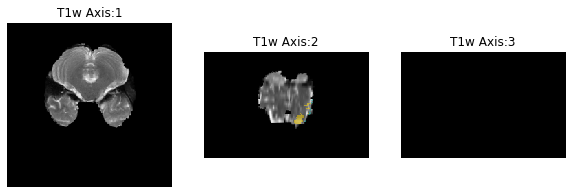

In [12]:
layer = 40

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
colors = ['none','gold', 'indigo', 'lightseagreen']
cmap = matplotlib.colors.ListedColormap(colors)
plt.imshow(img0[:,:,layer,3].T, cmap='gray')
plt.imshow(lab0[:,:,layer].T*10, cmap=cmap, alpha=0.5)
plt.axis('off')
plt.title(metadata['modality']["1"] + " Axis:1")

plt.subplot(1,3,2)
colors = ['none','gold', 'indigo', 'lightseagreen']
cmap = matplotlib.colors.ListedColormap(colors)
plt.imshow(img0[:,layer,:,3].T, cmap='gray')
plt.imshow(lab0[:,layer,:].T*10, cmap=cmap, alpha=0.5)
plt.axis('off')
plt.title(metadata['modality']["1"] + " Axis:2")

plt.subplot(1,3,3)
colors = ['none','gold', 'indigo', 'lightseagreen']
cmap = matplotlib.colors.ListedColormap(colors)
plt.imshow(img0[layer,:,:,3].T, cmap='gray')
plt.imshow(lab0[layer,:,:].T, cmap=cmap, alpha=0.5)
plt.axis('off')
plt.title(metadata['modality']["1"] + " Axis:3")

Text(0.5, 1.0, 'T1w Axis:3')

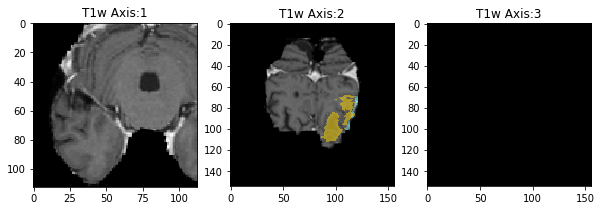

In [13]:
layer = 45

plt.figure(figsize=(10,10))

d = 78 # 155//2+1

plt.subplot(1,3,1)
colors = ['none','gold', 'indigo', 'lightseagreen']
cmap = matplotlib.colors.ListedColormap(colors)
min(0,img0.shape[0]//2-d-1)
plt.imshow(img0[max(0,img0.shape[0]//2-d):min(155,img0.shape[0]//2+d), max(0,img0.shape[1]//2-d):min(155,img0.shape[1]//2+d),layer,2].T, cmap='gray')
plt.imshow(lab0[max(0,lab0.shape[0]//2-d):min(155,lab0.shape[0]//2+d), max(0,lab0.shape[1]//2-d):min(155,lab0.shape[1]//2+d),layer].T, cmap=cmap, alpha=0.5)
# plt.axis('off')
plt.title(metadata['modality']["1"] + " Axis:1")

plt.subplot(1,3,2)
colors = ['none','gold', 'indigo', 'lightseagreen']
cmap = matplotlib.colors.ListedColormap(colors)
plt.imshow(img0[max(0,img0.shape[0]//2-d):max(155,img0.shape[0]//2+d),layer, max(0,img0.shape[2]//2-d):max(155,img0.shape[2]//2+d),2].T, cmap='gray')
plt.imshow(lab0[max(0,lab0.shape[0]//2-d):max(155,lab0.shape[0]//2+d),layer, max(0,lab0.shape[2]//2-d):max(155,lab0.shape[2]//2+d)].T, cmap=cmap, alpha=0.5)
# plt.axis('off')
plt.title(metadata['modality']["1"] + " Axis:2")

plt.subplot(1,3,3)
colors = ['none','gold', 'indigo', 'lightseagreen']
cmap = matplotlib.colors.ListedColormap(colors)
plt.imshow(img0[layer,max(0,img0.shape[1]//2-d):max(155,img0.shape[1]//2+d), max(0,img0.shape[2]//2-d):max(155,img0.shape[2]//2+d),2].T, cmap='gray')
plt.imshow(lab0[layer,max(0,lab0.shape[1]//2-d):max(155,lab0.shape[1]//2+d), max(0,lab0.shape[2]//2-d):max(155,lab0.shape[2]//2+d)].T, cmap=cmap, alpha=0.5)
# plt.axis('off')
plt.title(metadata['modality']["1"] + " Axis:3")

{'image': './imagesTr/BRATS_034.nii.gz', 'label': './labelsTr/BRATS_034.nii.gz'}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


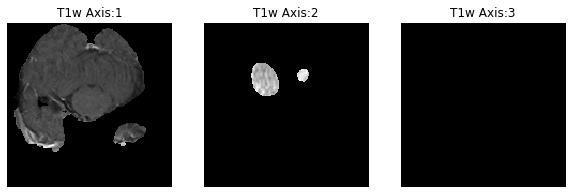

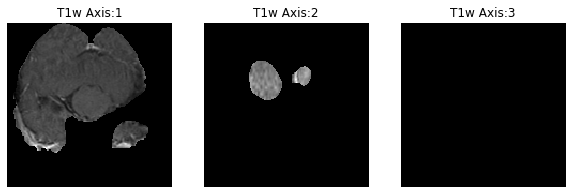

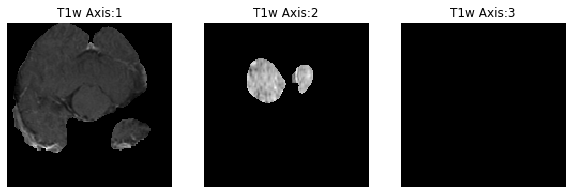

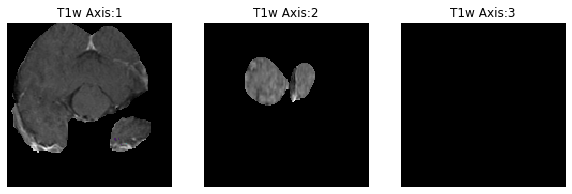

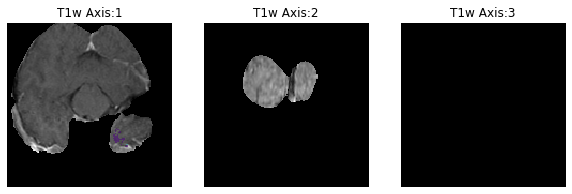

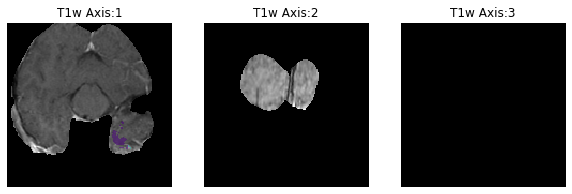

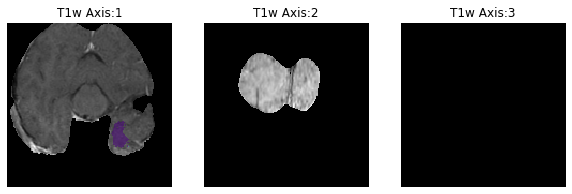

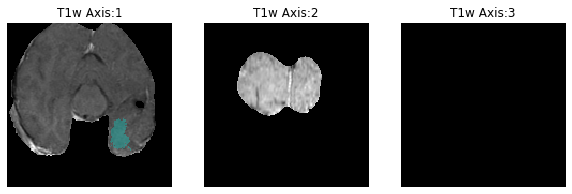

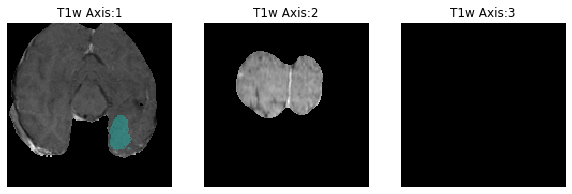

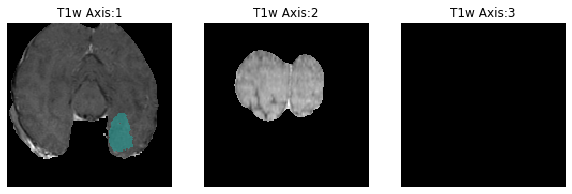

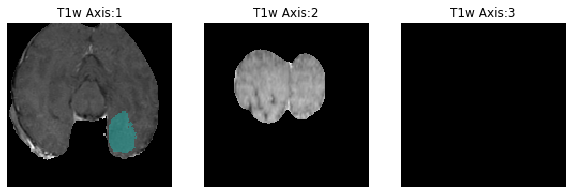

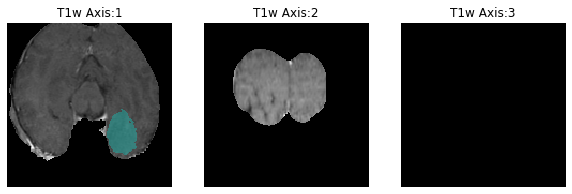

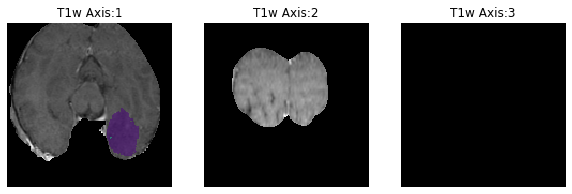

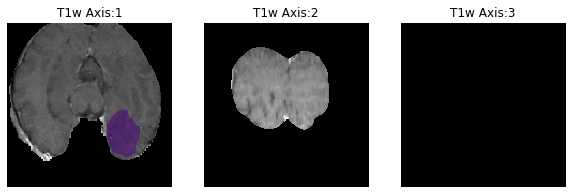

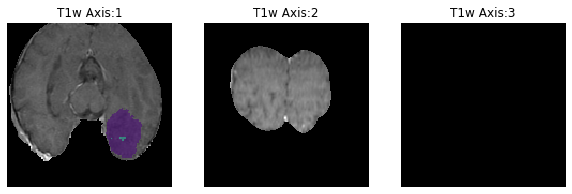

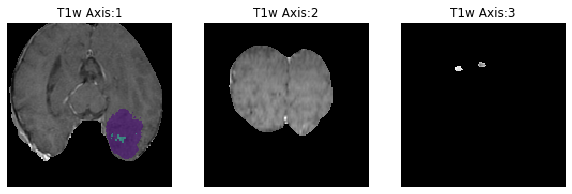

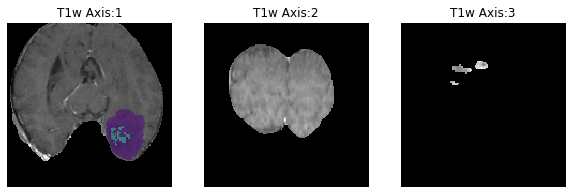

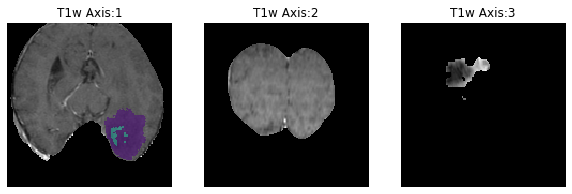

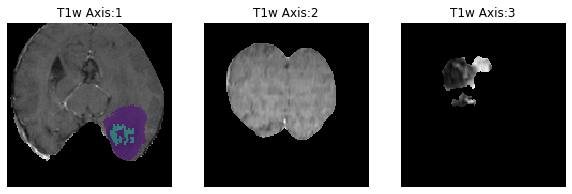

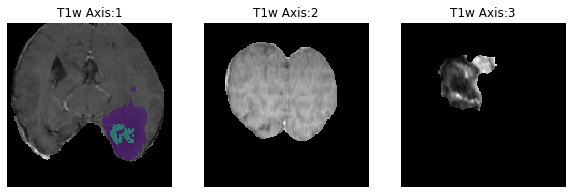

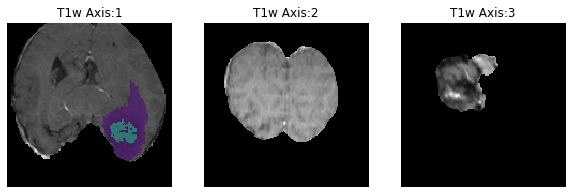

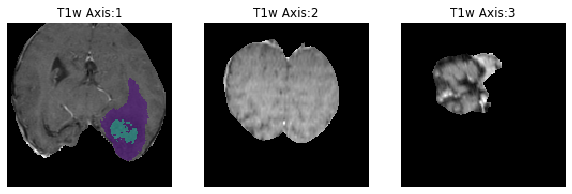

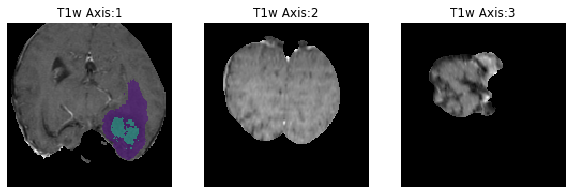

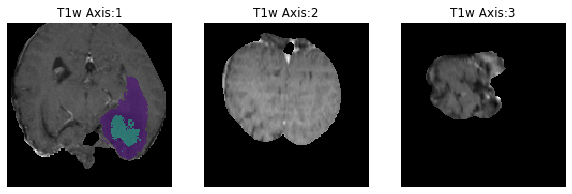

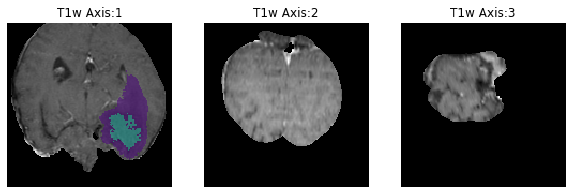

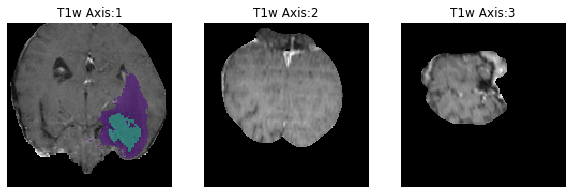

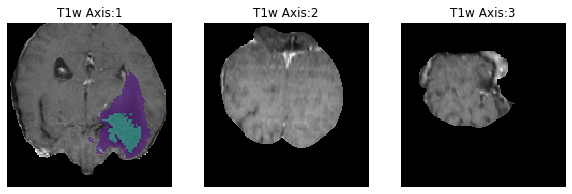

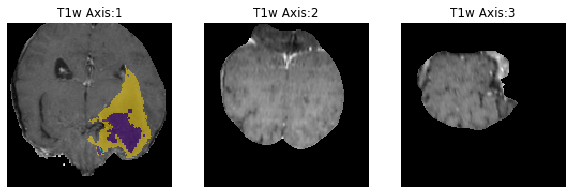

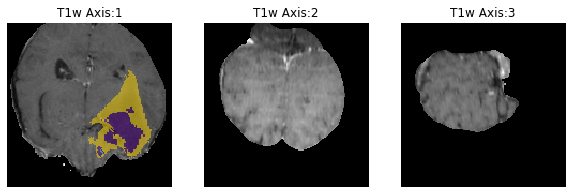

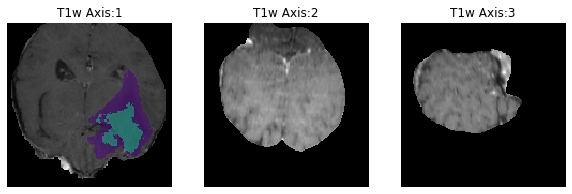

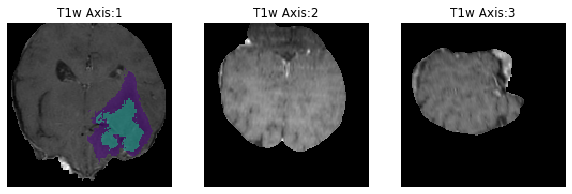

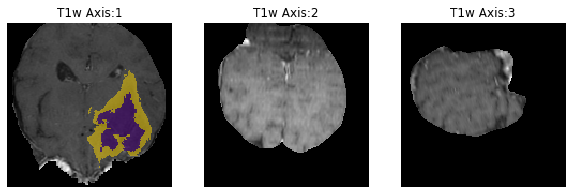

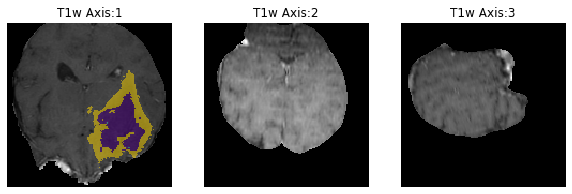

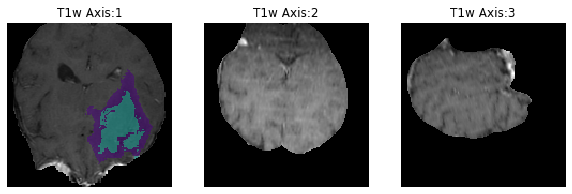

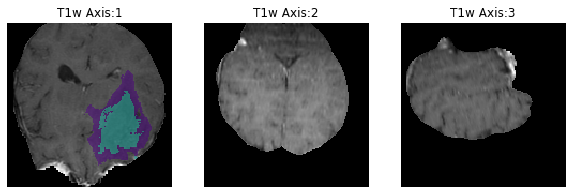

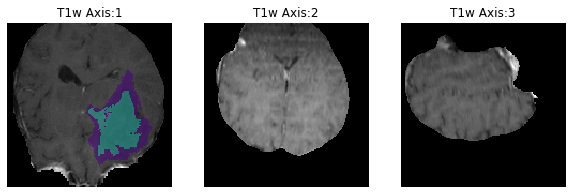

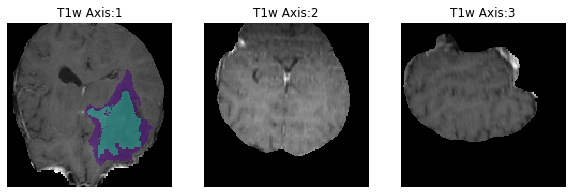

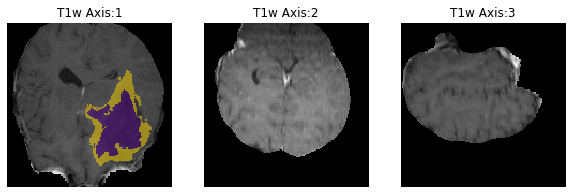

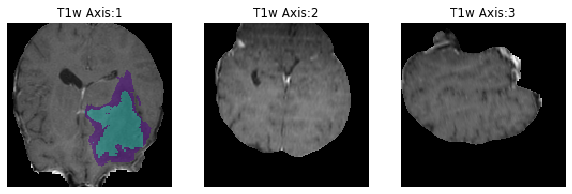

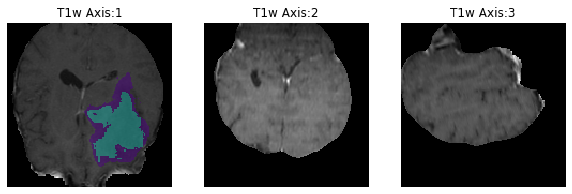

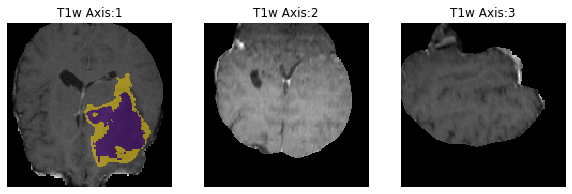

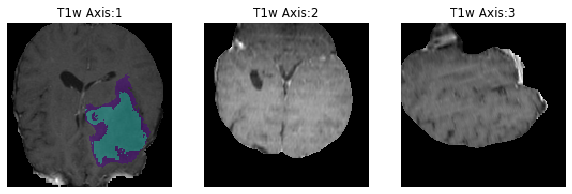

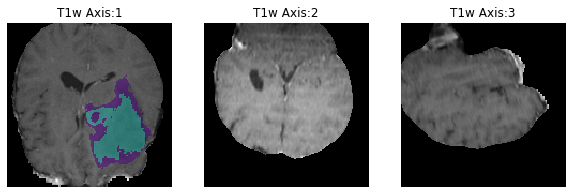

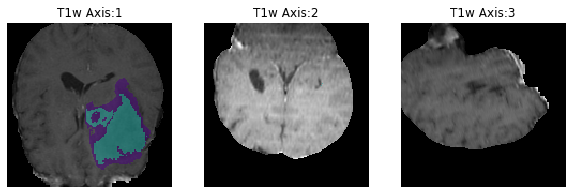

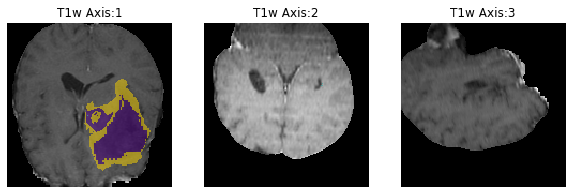

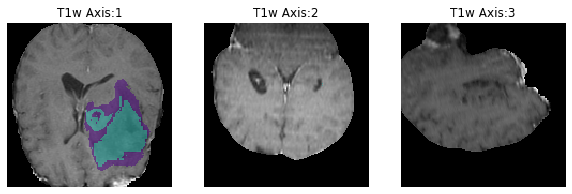

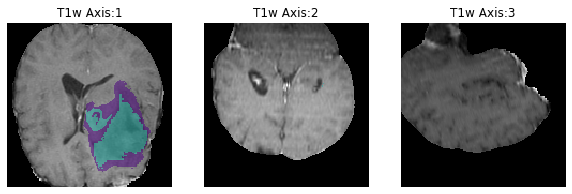

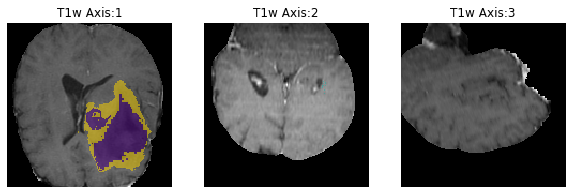

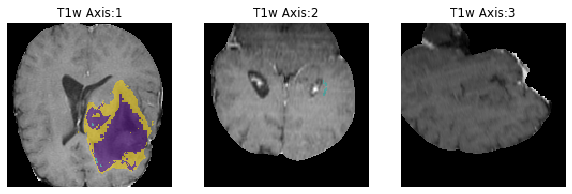

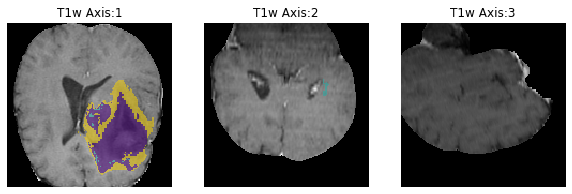

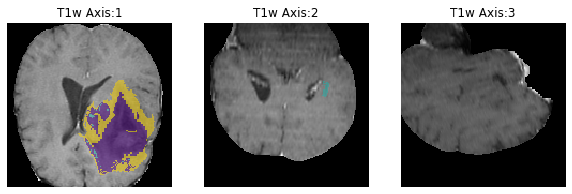

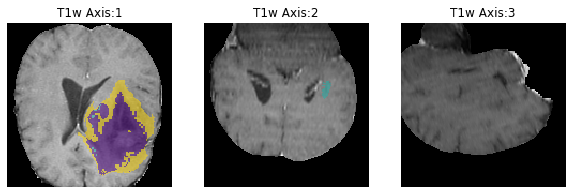

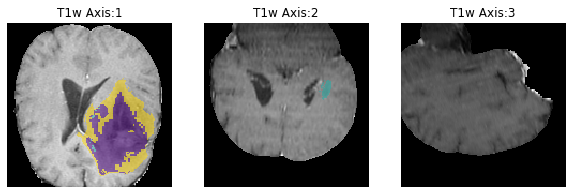

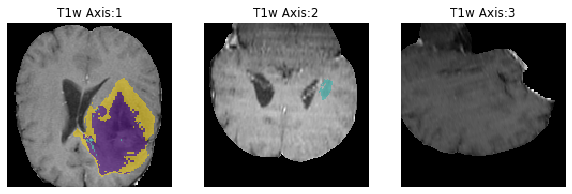

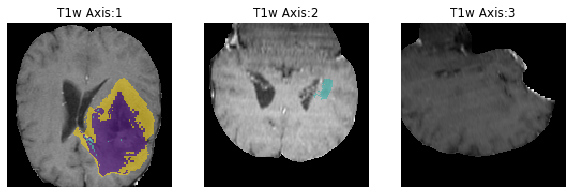

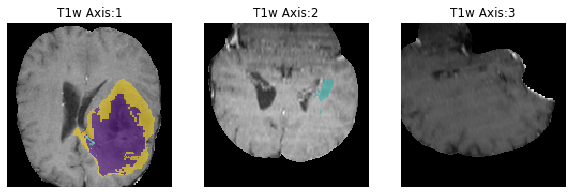

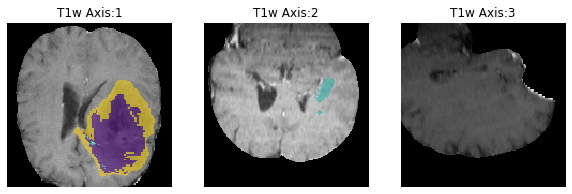

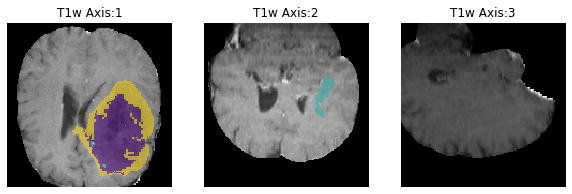

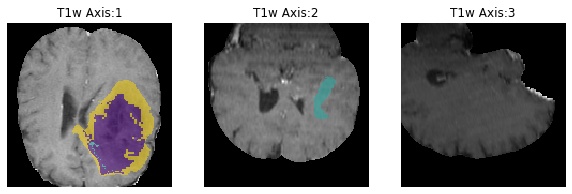

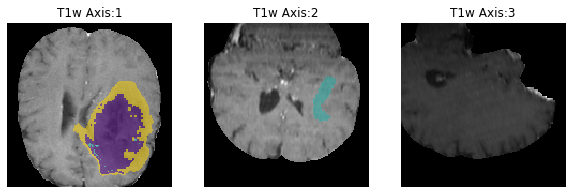

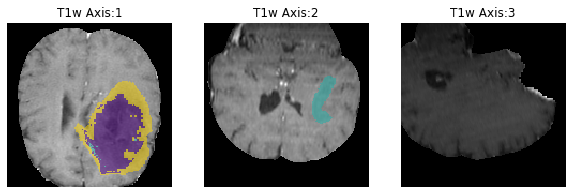

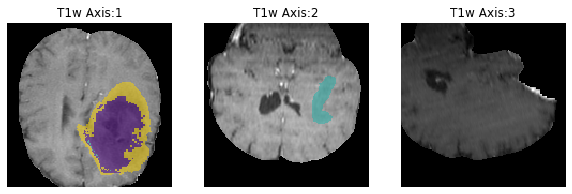

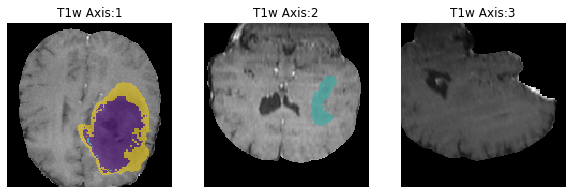

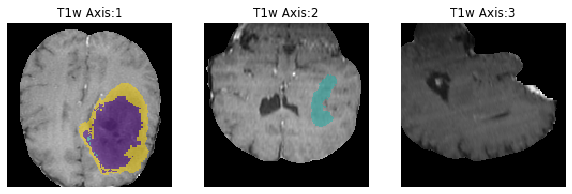

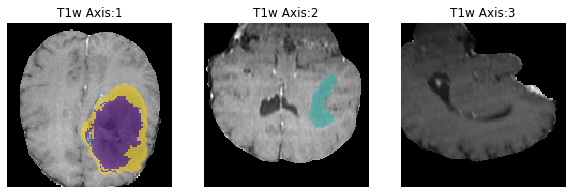

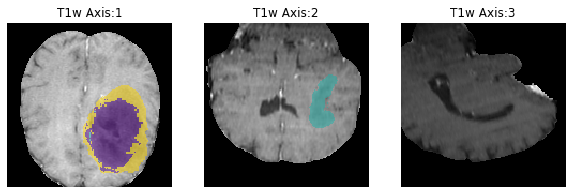

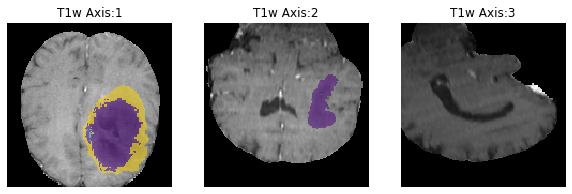

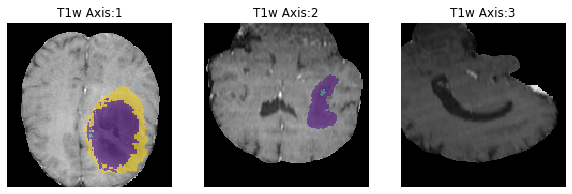

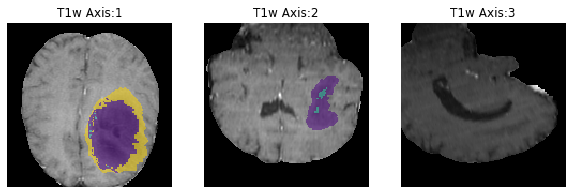

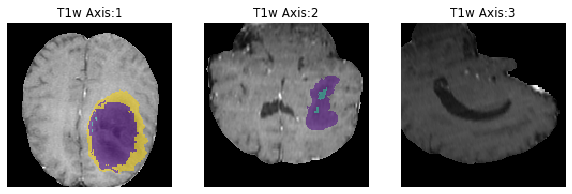

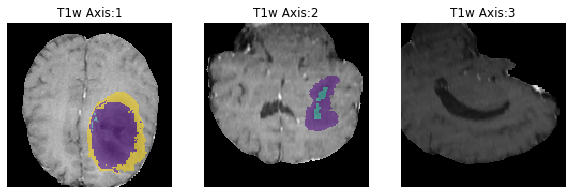

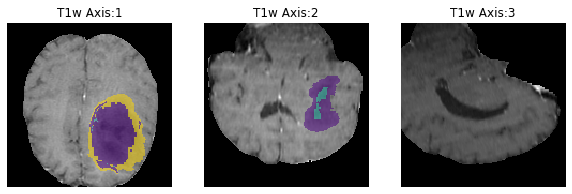

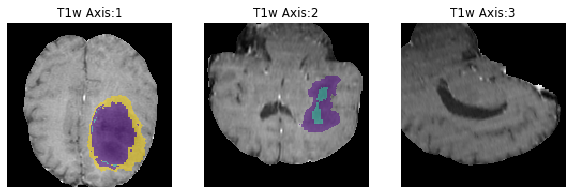

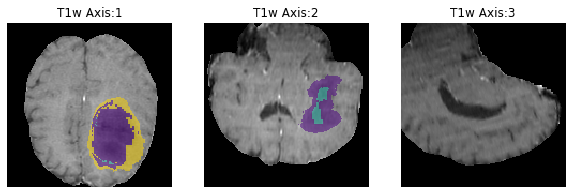

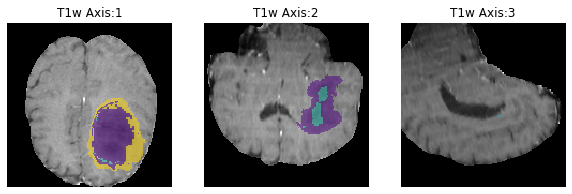

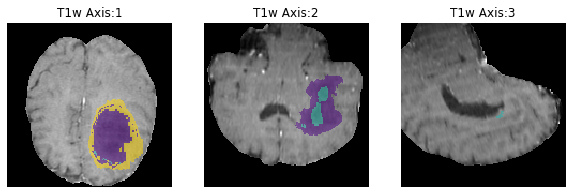

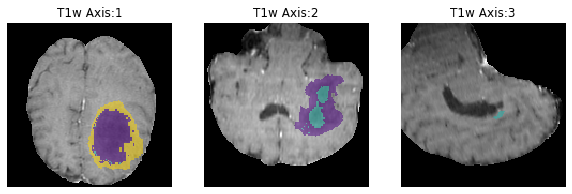

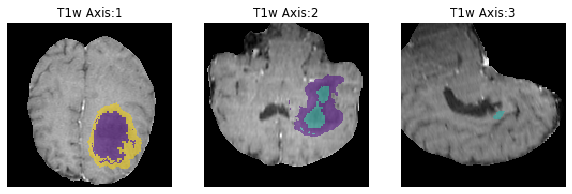

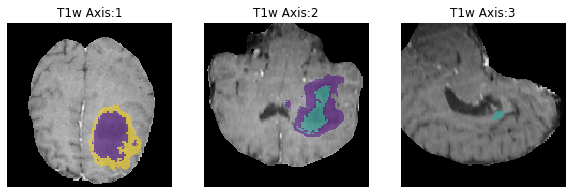

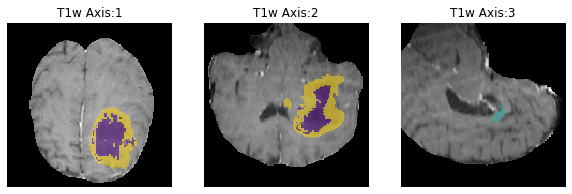

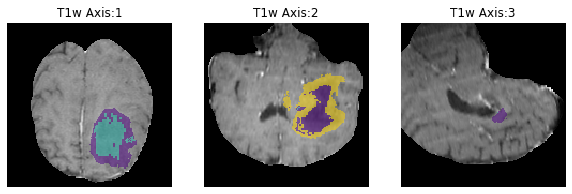

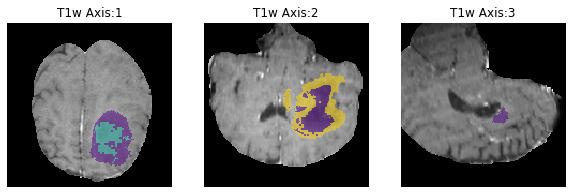

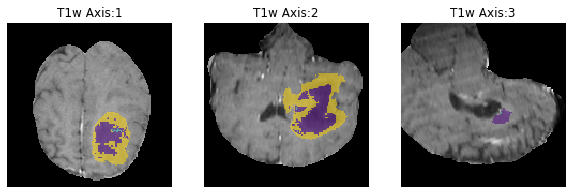

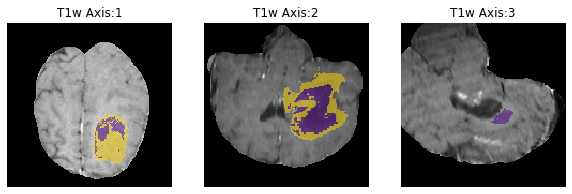

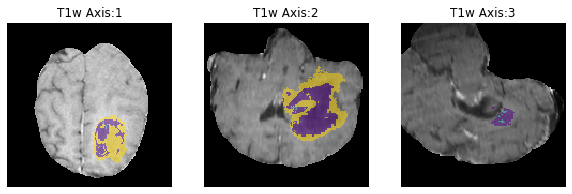

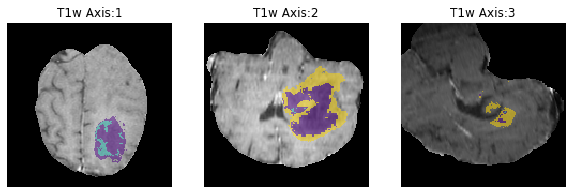

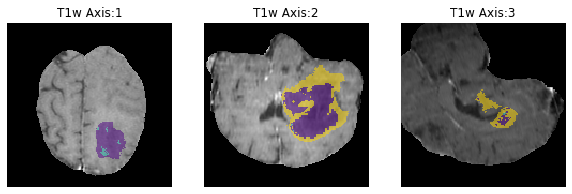

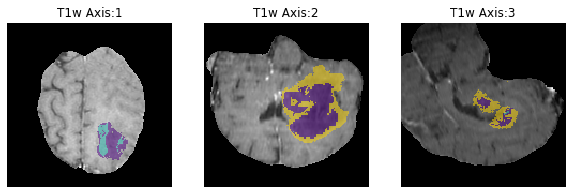

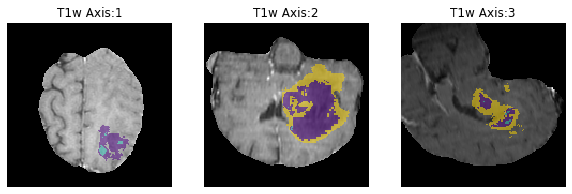

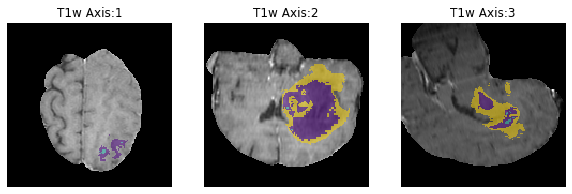

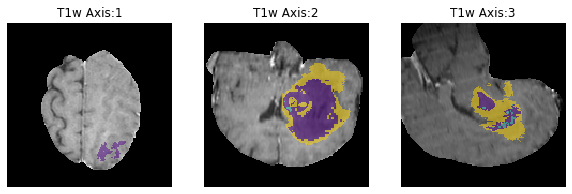

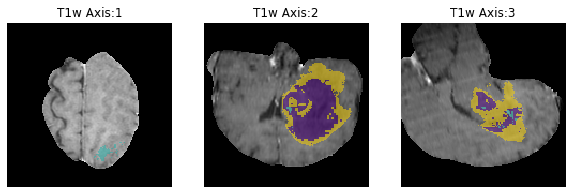

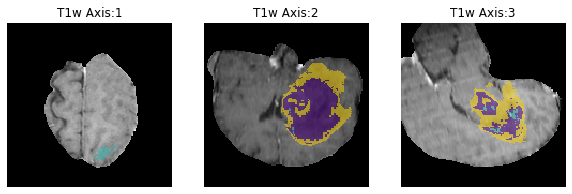

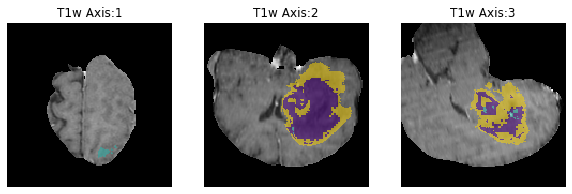

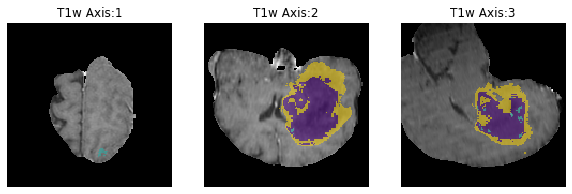

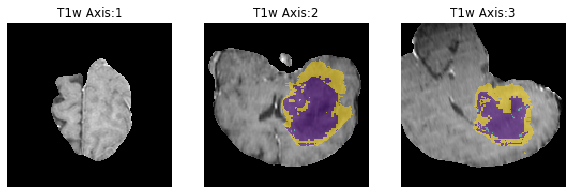

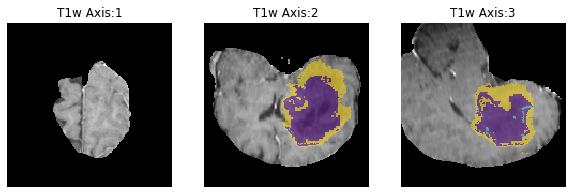

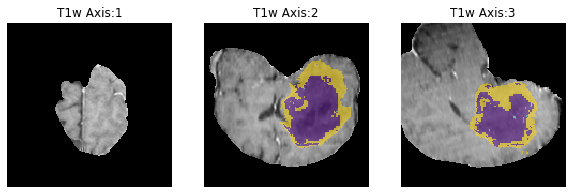

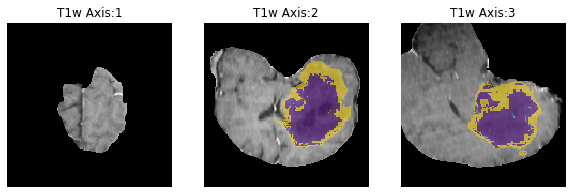

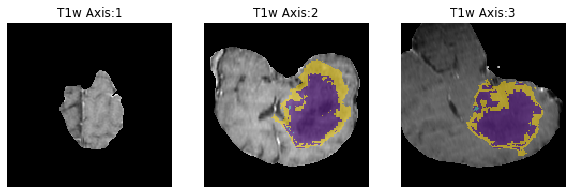

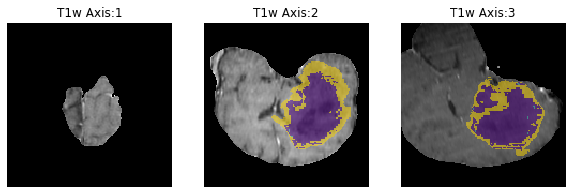

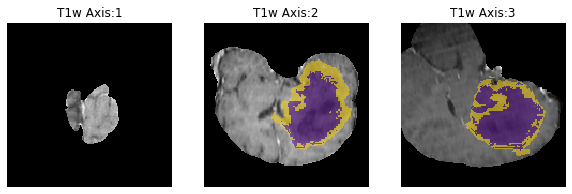

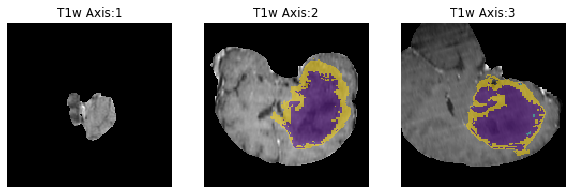

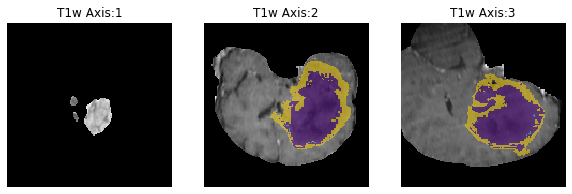

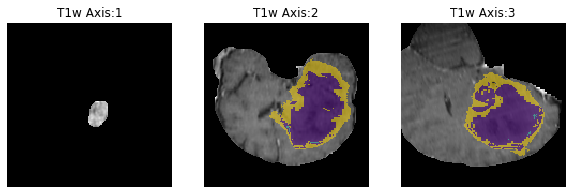

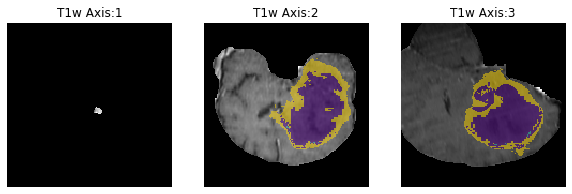

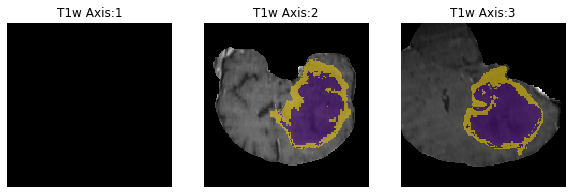

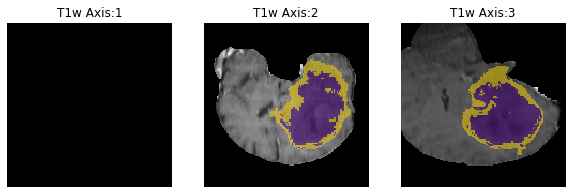

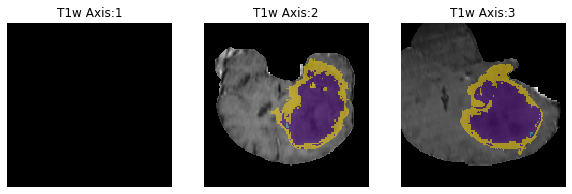

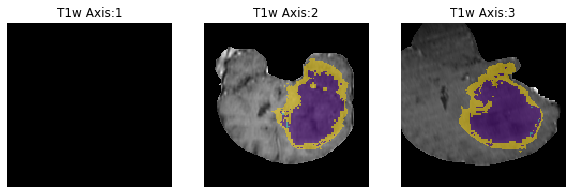

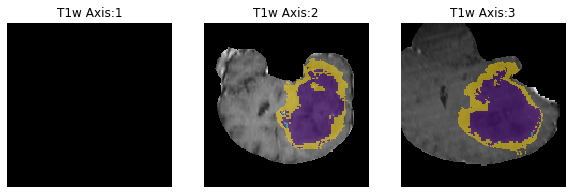

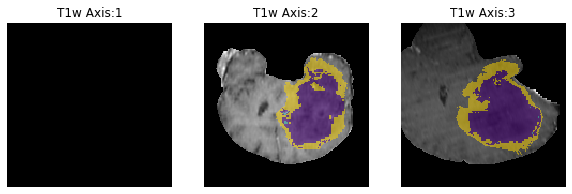

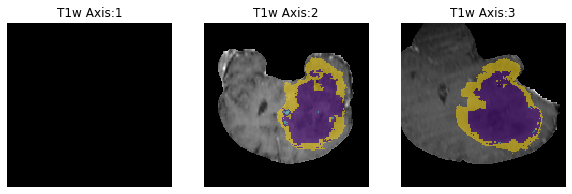

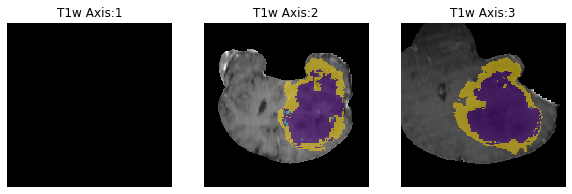

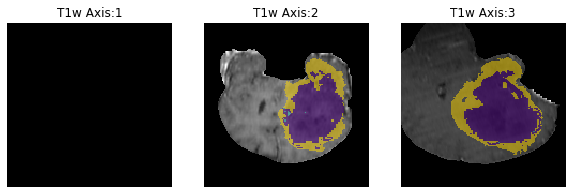

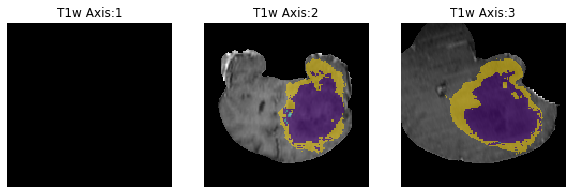

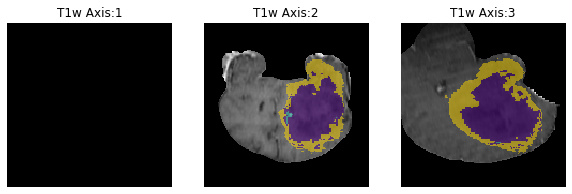

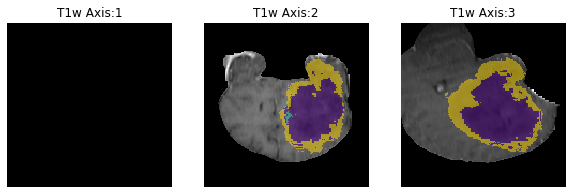

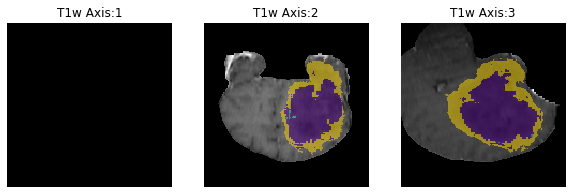

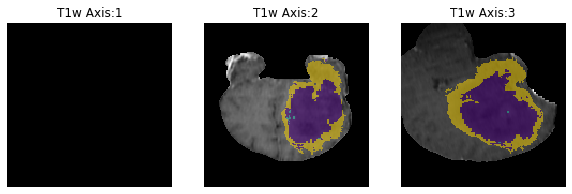

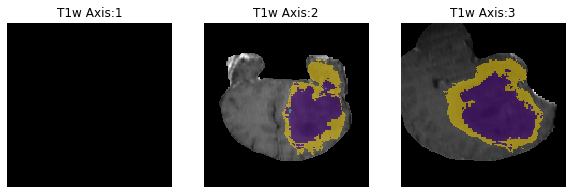

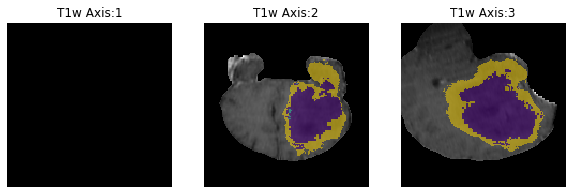

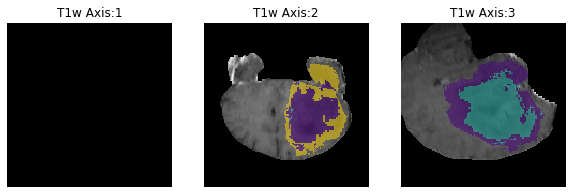

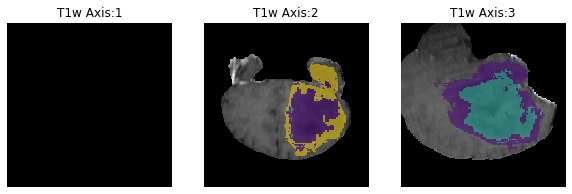

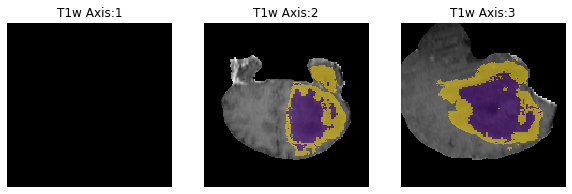

In [14]:
img0, lab0, name_img = data_load(404)
for layer in range(30, 155):
#     layer = 45

    plt.figure(figsize=(10,10))

    d = 77

    plt.subplot(1,3,1)
    colors = ['none','gold', 'indigo', 'lightseagreen']
    cmap = matplotlib.colors.ListedColormap(colors)
    plt.imshow(img0[img0.shape[0]//2-d:img0.shape[0]//2+d, img0.shape[1]//2-d-10:img0.shape[1]//2+d-10,layer,2].T, cmap='gray')
    plt.imshow(lab0[lab0.shape[0]//2-d:lab0.shape[0]//2+d, lab0.shape[1]//2-d-10:lab0.shape[1]//2+d-10,layer].T, cmap=cmap, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["1"] + " Axis:1")

    plt.subplot(1,3,2)
    colors = ['none','gold', 'indigo', 'lightseagreen']
    cmap = matplotlib.colors.ListedColormap(colors)
    plt.imshow(img0[img0.shape[0]//2-d:img0.shape[0]//2+d,layer, img0.shape[2]//2-d:img0.shape[2]//2+d,2].T, cmap='gray')
    plt.imshow(lab0[lab0.shape[0]//2-d:lab0.shape[0]//2+d,layer, lab0.shape[2]//2-d:lab0.shape[2]//2+d].T, cmap=cmap, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["1"] + " Axis:2")

    plt.subplot(1,3,3)
    colors = ['none','gold', 'indigo', 'lightseagreen']
    cmap = matplotlib.colors.ListedColormap(colors)
    plt.imshow(img0[layer,img0.shape[1]//2-d:img0.shape[1]//2+d, img0.shape[2]//2-d:img0.shape[2]//2+d,2].T, cmap='gray')
    plt.imshow(lab0[layer,lab0.shape[1]//2-d:lab0.shape[1]//2+d, lab0.shape[2]//2-d:lab0.shape[2]//2+d].T, cmap=cmap, alpha=0.5)
    plt.axis('off')
    plt.title(metadata['modality']["1"] + " Axis:3")